In [0]:
# Save model to your Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q './gdrive/My Drive/NLP/Final-Project/output/lstm_bert_output_c4.zip' -d ./lstm_bert_c

In [0]:
import os
import pandas as pd
import numpy as np
import re, string

In [0]:
DATA_SET_DIR = './gdrive/My Drive/NLP/Final-Project/data/'
# TRAINING_DATA_PATH = DATA_SET_DIR+'train_bert_vector.npy'
TEST_PATH_DICT = {}
TEST_A_DATA_PATH = DATA_SET_DIR+'test_bert_vector_subtask_a.npy'
TEST_B_DATA_PATH = DATA_SET_DIR+'test_bert_vector_subtask_b.npy'
TEST_C_DATA_PATH = DATA_SET_DIR+'test_bert_vector_subtask_c.npy'
TEST_PATH_DICT['subtask_a'] = TEST_A_DATA_PATH
TEST_PATH_DICT['subtask_b'] = TEST_B_DATA_PATH
TEST_PATH_DICT['subtask_c'] = TEST_C_DATA_PATH

bert_data={}
# bert_data['train'] = {}
# bert_data['validation'] = {}
bert_data['test'] = {}
task_list = ['subtask_a','subtask_b','subtask_c']
# bert_data['train'] = np.load(TRAINING_DATA_PATH)
for subtask in task_list:
    bert_data['test'][subtask] = np.load(TEST_PATH_DICT[subtask])

In [0]:
TEST_A_LABEL_PATH = DATA_SET_DIR+'labels-levela.csv'
TEST_B_LABEL_PATH = DATA_SET_DIR+'labels-levelb.csv'
TEST_C_LABEL_PATH = DATA_SET_DIR+'labels-levelc.csv'
TEST_LABEL_PATH_DICT = {}
TEST_LABEL_PATH_DICT['subtask_a'] = TEST_A_LABEL_PATH
TEST_LABEL_PATH_DICT['subtask_b'] = TEST_B_LABEL_PATH
TEST_LABEL_PATH_DICT['subtask_c'] = TEST_C_LABEL_PATH
classes_dict = {}
classes_dict['subtask_a'] = {'NOT' : 0 ,'OFF' : 1}
classes_dict['subtask_b'] = {'UNT' : 0 ,'TIN' : 1}
classes_dict['subtask_c'] = {'IND' : 0 ,'OTH' : 1, 'GRP' : 2}
test_label={}
for subtask in task_list:
    temp_df = pd.read_csv(TEST_LABEL_PATH_DICT[subtask],sep=',',header=None)
    test_label[subtask] =np.asarray(temp_df[1].apply(lambda x: classes_dict[subtask][x])).astype('int')

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,subtask,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=list(classes_dict[subtask].keys()), yticklabels=list(classes_dict[subtask].keys()),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,accuracy_score
def test_model(MODEL_PATH,subtask):
  if os.path.exists(MODEL_PATH):
        model=load_model(MODEL_PATH)
      # 若成功加载前面保存的参数，输出下列信息
        print("checkpoint_loaded")
  predictions = model.predict(bert_data['test'][subtask])
  if subtask == 'subtask_c':
    print(predictions.shape)
    predictions=np.argmax(predictions,axis=1)
  else:
    predictions=predictions.round().astype('int').reshape(-1)
  testing_f1 = f1_score(test_label[subtask], predictions,average='macro')
  testing_acc = accuracy_score(test_label[subtask], predictions)
  print('testing data f1-score:',testing_f1)
  print('testing data accuracy:',testing_acc)
  return predictions

#Performance of Bert Embeddings and CNN on Task A

In [0]:
TARGET_TASK = 'subtask_a'
predictions = test_model('./output2/CNN_Train_subtask_a_4.hdf5',TARGET_TASK)

checkpoint_loaded
testing data f1-score: 0.7518655008042515
testing data accuracy: 0.8058139534883721


Normalized confusion matrix
[[0.88 0.12]
 [0.39 0.61]]


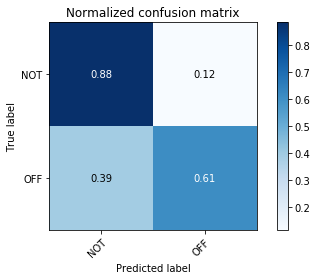

In [0]:
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_cnn_bert_a.png')
plt.show()

#Performance of Bert Embeddings and CNN on Task B

In [0]:
TARGET_TASK = 'subtask_b'
predictions = test_model('./output/CNN_Train_subtask_b_3_TRUE.hdf5',TARGET_TASK)

checkpoint_loaded
testing data f1-score: 0.7063948100092678
testing data accuracy: 0.8625


Normalized confusion matrix
[[0.59 0.41]
 [0.1  0.9 ]]


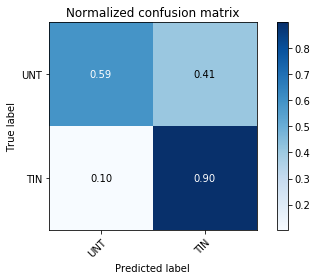

In [0]:
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_cnn_bert_b.png')
plt.show()

#Performance of Bert Embeddings and CNN on Task C

checkpoint_loaded
(213, 3)
testing data f1-score: 0.6077566713017322
testing data accuracy: 0.6807511737089202
Normalized confusion matrix
[[0.76 0.07 0.17]
 [0.31 0.31 0.37]
 [0.15 0.1  0.74]]


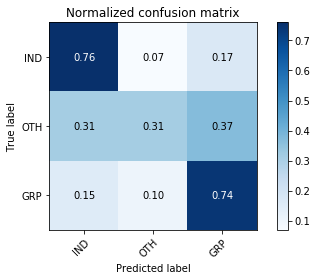

In [0]:
TARGET_TASK = 'subtask_c'
predictions = test_model('./output2/CNN_Train_subtask_c_4.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_cnn_bert_c.png')
plt.show()

In [0]:
import os
import pandas as pd
DATA_SET_DIR = './gdrive/My Drive/NLP/Final-Project/data/'
TRAINING_DATA_PATH = DATA_SET_DIR+'olid-training-clean.csv'
TEST_PATH_DICT = {}
TEST_A_DATA_PATH = DATA_SET_DIR+'testset-levela-clean.tsv'
TEST_B_DATA_PATH = DATA_SET_DIR+'testset-levelb-clean.tsv'
TEST_C_DATA_PATH = DATA_SET_DIR+'testset-levelc-clean.tsv'
TEST_PATH_DICT['subtask_a'] = TEST_A_DATA_PATH
TEST_PATH_DICT['subtask_b'] = TEST_B_DATA_PATH
TEST_PATH_DICT['subtask_c'] = TEST_C_DATA_PATH

data={}
data['train'] = {}
data['validation'] = {}
data['test'] = {}
task_list = ['subtask_a','subtask_b','subtask_c']
train = pd.read_csv(TRAINING_DATA_PATH,sep='\t', index_col='id')
for subtask in task_list:
    data['test'][subtask] = pd.read_csv(TEST_PATH_DICT[subtask],sep='\t', index_col='id')
train.head(3)

,tweet_exp,subtask_a,subtask_b,subtask_c
id,,,,
86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
90194,@USER @USER Go home you are drunk!!! @USER #MA...,OFF,TIN,IND
16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN


In [0]:
def clean_tweet(text):
#     def handle_emoji(text):
#       # Dictionnary of "important" emojis : 
#       emoji_dict =  {'♥️': ' love ',
#                      '❤️' : ' love ',
#                      '❤' : ' love ',
#                      '😘' : ' kisses ',
#                     '😭' : ' cry ',
#                     '💪' : ' strong ',
#                     '🌍' : ' earth ',
#                     '💰' : ' money ',
#                     '👍' : ' ok ',
#                      '👌' : ' ok ',
#                     '😡' : ' angry ',
#                     '🍆' : ' dick ',
#                     '🤣' : ' haha ',
#                     '😂' : ' haha ',
#                     '🖕' : ' fuck you '}

#       for cha in emoji_dict:
#           text = re.compile(str(cha)).sub(str(emoji_dict[cha]),text)
#       # Remove ALL emojis
#       text = emoji.get_emoji_regexp().sub(r' ',text) 
#       text = re.compile("([\U0001f3fb-\U0001f3ff])").sub(r'',text) 
#       text = re.compile("([\U00010000-\U0010ffff])").sub(r'',text) 
#       text = re.compile("(\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff])").sub(r'',text)

#       # Add Space between  the Emoji Expressions : 
#       text = re.compile("([\U00010000-\U0010ffff])").sub(r' \1 ',text) 
#       return text
    ''' Function that is applied to every to tweet in the dataset '''

    # =========== TEXT ===========
    # Replace @USER by <user>
    text = re.compile(r'@USER').sub(r'<user>',text)

    # Replace URL by <url>
    text = re.compile(r'URL').sub(r'<url>',text)

    # Remove numbers :
    text = re.compile(r'[0-9]+').sub(r' ',text)

    # Remove some special characters
    text = re.compile(r'([\xa0_\{\}\[\]¬•$,:;/@#|\^*%().~`”"“-])').sub(r' ',text) 

    # Space the special characters with white spaces
    text = re.compile(r'([$&+,:;=?@#|.^*()%!"’“-])').sub(r' \1 ',text)

    # Replace some special characters : 
    replace_dict = {r'&' : 'and' , 
                    r'\+' : 'plus'}
    for cha in replace_dict:
        text = re.compile(str(cha)).sub(str(replace_dict[cha]),text)

    # Handle Emoji : translate some and delete the others
#     text = handle_emoji(text)

    # Word delengthening : 
    text = re.compile(r'(.)\1{3,}').sub(r'\1\1',text)

    # Cut the words with caps in them : 
    text = re.compile(r'([a-z]+|[A-Z]+|[A-Z][a-z]+)([A-Z][a-z]+)').sub(r'\1 \2',text)
    text = re.compile(r'([a-z]+|[A-Z]+|[A-Z][a-z]+)([A-Z][a-z]+)').sub(r'\1 \2',text)        
    # =========== TOKENS ===========
    # TOKENIZE 
    text = text.split(' ')

    # Remove white spaces tokens
    text = [text[i] for i in range(len(text)) if text[i] != ' ']

    # Remove empty tokens
    text = [text[i] for i in range(len(text)) if text[i] != '']

    # Remove repetition in tokens (!!! => !)
    text = [text[i] for i in range(len(text)) if text[i] != text[i-1]]

    #  Handle the ALL CAPS Tweets 
    ### if ratio of caps in the word > 75% add allcaps tag <allcaps>
    caps_r = np.mean([text[i].isupper() for i in range(len(text))])
    if caps_r > 0.6 : 
        text.append('<allcaps>')

    # Lower Case : 
    text = [text[i].lower() for i in range(len(text))]

    return ' '.join(text)

In [0]:
def _run_split_on_punc(text):
    """Splits punctuation on a piece of text."""
    chars = list(text)
    i = 0
    start_new_word = True
    output = []
    def _is_punctuation(char):
        # print('[%s]+' % re.escape(string.punctuation))
        if re.match(r'[\!\"\$\%\&\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^_\`\{\|\}\~]+',char):
            return True
        else:
            return False
    while i < len(chars):
        char = chars[i]
        if _is_punctuation(char):
            output.append([char])
            start_new_word = True
        else:
            if start_new_word:
                output.append([])
            start_new_word = False
            output[-1].append(char)
        i += 1
    text_list = ["".join(x) for x in output]
    text = ' '.join(text_list)
    text = text.split(' ')
    return ' '.join(text)
print(_run_split_on_punc("@USER @USER @USER @USER LOL!!!   Throwing the BULLSHIT Flag on such nonsense!!  #PutUpOrShutUp"))

@USER @USER @USER @USER LOL ! ! !    Throwing the BULLSHIT Flag on such nonsense ! !   #PutUpOrShutUp


In [0]:
train.tweet_exp = train.tweet_exp.apply(_run_split_on_punc)
train.tweet_exp = train.tweet_exp.apply(clean_tweet)
for subtask in task_list:
    data['test'][subtask].tweet_exp = data['test'][subtask].tweet_exp.apply(_run_split_on_punc)
    data['test'][subtask].tweet_exp = data['test'][subtask].tweet_exp.apply(clean_tweet)

In [0]:
import numpy as np
corpus_train = train.tweet_exp
corpus = pd.concat([train.tweet_exp, data['test']['subtask_a'].tweet_exp,data['test']['subtask_b'].tweet_exp,data['test']['subtask_c'].tweet_exp])
print(train.shape,corpus.shape)
print(data['test']['subtask_a'].shape,data['test']['subtask_b'].shape,data['test']['subtask_c'].shape)
pd.DataFrame(corpus.iloc[:5],columns=['tweet_exp'])

(13240, 4) (14553,)
(860, 1) (240, 1) (213, 1)


,tweet_exp
id,
86426,<user> she should ask a few native americans w...
90194,<user> go home you are drunk ! <user> maga tru...
16820,amazon is investigating chinese employees who ...
62688,<user> someone should've taken this piece of s...
43605,<user> obama wanted liberals and amp illegals ...


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS=10000
tokenizer = Tokenizer(nb_words=None,filters='')
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus_train)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [0]:
for seq in X[:3]:
    print(seq)
    print([tokenizer.index_word[idx] for idx in seq])
MAX_SEQUENCE_LENGTH = max([len(X[i]) for i in range(len(X))])
print('MAX_SEQUENCE_LENGTH:',MAX_SEQUENCE_LENGTH)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

[1, 17, 80, 340, 7, 466, 2875, 303, 37, 67, 134, 24, 22, 3]
['<user>', 'she', 'should', 'ask', 'a', 'few', 'native', 'americans', 'what', 'their', 'take', 'on', 'this', 'is']
[1, 91, 308, 6, 8, 1043, 12, 1, 43, 63, 20]
['<user>', 'go', 'home', 'you', 'are', 'drunk', '!', '<user>', 'maga', 'trump', '<url>']
[1945, 3, 7009, 2072, 2646, 49, 8, 1755, 5503, 1455, 4, 1670, 130, 9658, 285, 19, 64, 2876, 15, 2, 2877, 5504, 20, 1945, 43, 317, 985, 475]
['amazon', 'is', 'investigating', 'chinese', 'employees', 'who', 'are', 'selling', 'internal', 'data', 'to', 'third', 'party', 'sellers', 'looking', 'for', 'an', 'edge', 'in', 'the', 'competitive', 'marketplace', '<url>', 'amazon', 'maga', 'kag', 'china', 'tcot']
MAX_SEQUENCE_LENGTH: 66
Found 19638 unique tokens.


In [0]:
import keras
from keras.preprocessing.sequence import pad_sequences
def text2id(tokenizer,texts_pd,max_seq_length=MAX_SEQUENCE_LENGTH):
  x_training = tokenizer.texts_to_sequences(texts_pd)
  x_training = keras.preprocessing.sequence.pad_sequences(x_training,maxlen=max_seq_length)
  for seq in x_training:
      assert len(seq) == max_seq_length
  print("all sequence length are ",max_seq_length)
  return x_training

In [0]:
GLOVE_DIR='./gdrive/My Drive/NLP/Final-Project/WordEmb'
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.twitter.27B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [0]:
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
null_words = open('./output2/null-word.txt', 'w', encoding='utf-8')
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        null_words.write(word + '\n')
print('###[EMB] Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
###[EMB] Null word embeddings: 5696

###[EMB] Null word embeddings: 2710


In [0]:
for subtask in task_list:
  data['test'][subtask+'_x_test'] = text2id(tokenizer, data['test'][subtask].tweet_exp)

all sequence length are  66
all sequence length are  66
all sequence length are  66


In [0]:
def test_base_model(MODEL_PATH,subtask):
  if os.path.exists(MODEL_PATH):
        model=load_model(MODEL_PATH)
      # 若成功加载前面保存的参数，输出下列信息
        print("checkpoint_loaded")
  predictions = model.predict(data['test'][subtask+'_x_test'])
  if subtask == 'subtask_c':
    print(predictions.shape)
    predictions=np.argmax(predictions,axis=1)
  else:
    predictions=predictions.round().astype('int').reshape(-1)
  testing_f1 = f1_score(test_label[subtask], predictions,average='macro')
  testing_acc = accuracy_score(test_label[subtask], predictions)
  print('testing data f1-score:',testing_f1)
  print('testing data accuracy:',testing_acc)
  return predictions

#Performance of Glov Embeddings and CNN on Task A

checkpoint_loaded
testing data f1-score: 0.7654669414935785
testing data accuracy: 0.8
Normalized confusion matrix
[[0.82 0.18]
 [0.25 0.75]]


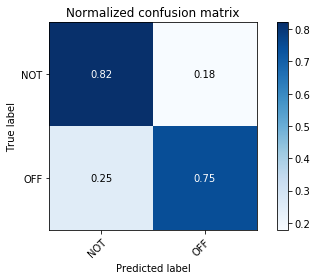

In [0]:
TARGET_TASK = 'subtask_a'
predictions = test_base_model('./output2/output/CNN_Train_subtask_a.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_cnn_base_a.png')
plt.show()

#Performance of Glov Embeddings and CNN on Task B

checkpoint_loaded
testing data f1-score: 0.6862232390913547
testing data accuracy: 0.8666666666666667
Normalized confusion matrix
[[0.48 0.52]
 [0.08 0.92]]


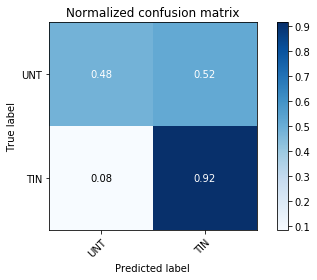

In [0]:
TARGET_TASK = 'subtask_b'
predictions = test_base_model('./output_b/output/CNN_Train_subtask_b.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_cnn_base_b.png')
plt.show()

#Performance of Glov Embeddings and CNN on Task C

checkpoint_loaded
(213, 3)
testing data f1-score: 0.5878947678019647
testing data accuracy: 0.6572769953051644
Normalized confusion matrix
[[0.72 0.12 0.16]
 [0.34 0.31 0.34]
 [0.17 0.1  0.73]]


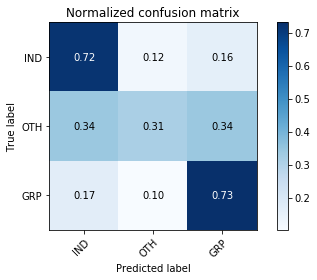

In [0]:
TARGET_TASK = 'subtask_c'
predictions = test_base_model('./output_c/output/CNN_Train_subtask_c.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_cnn_base_c.png')
plt.show()

#Performance of Glov Embeddings and LSTM on Task A

checkpoint_loaded
testing data f1-score: 0.755839967293912
testing data accuracy: 0.7965116279069767
Normalized confusion matrix
[[0.84 0.16]
 [0.3  0.7 ]]


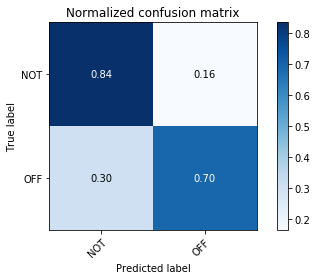

In [0]:
TARGET_TASK = 'subtask_a'
predictions = test_base_model('./lstm_a/output/CNN_Train_subtask_a.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_lstm_base_a.png')
plt.show()

#Performance of Glov Embeddings and LSTM on Task B

checkpoint_loaded
testing data f1-score: 0.6530202052258542
testing data accuracy: 0.8291666666666667
Normalized confusion matrix
[[0.52 0.48]
 [0.13 0.87]]


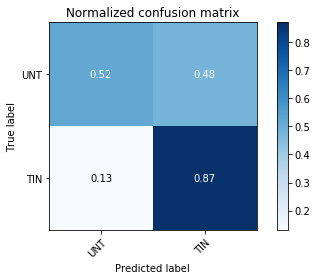

In [0]:
TARGET_TASK = 'subtask_b'
predictions = test_base_model('./lstm_b/output/CNN_Train_subtask_b.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_lstm_base_b.png')
plt.show()

#Performance of Glov Embeddings and LSTM on Task C

checkpoint_loaded
(213, 3)
testing data f1-score: 0.5773644118175659
testing data accuracy: 0.6291079812206573
Normalized confusion matrix
[[0.69 0.12 0.19]
 [0.2  0.4  0.4 ]
 [0.15 0.19 0.65]]


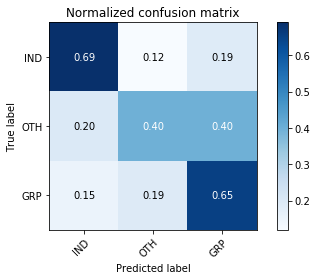

In [0]:
TARGET_TASK = 'subtask_c'
predictions = test_base_model('./lstm_c/output/CNN_Train_subtask_c.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_lstm_base_c.png')
plt.show()

#Performance of Bert Embeddings and LSTM on Task A

checkpoint_loaded
testing data f1-score: 0.7341427085968018
testing data accuracy: 0.7825581395348837
Normalized confusion matrix
[[0.84 0.16]
 [0.36 0.64]]


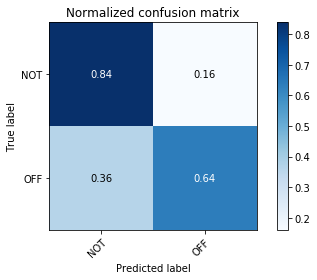

In [0]:
TARGET_TASK = 'subtask_a'
predictions = test_model('./lstm_bert_a/output3/CNN_Train_subtask_a_4.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_lstm_bert_a.png')
plt.show()

#Performance of Bert Embeddings and LSTM on Task B

checkpoint_loaded
testing data f1-score: 0.6210241371531694
testing data accuracy: 0.7958333333333333
Normalized confusion matrix
[[0.52 0.48]
 [0.17 0.83]]


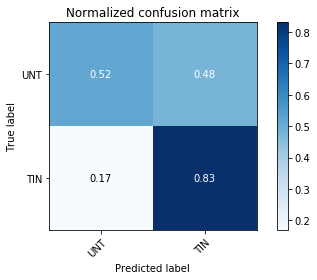

In [0]:
TARGET_TASK = 'subtask_b'
predictions = test_model('./lstm_bert_b/output4/CNN_Train_subtask_b_4.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_lstm_bert_b.png')
plt.show()

#Performance of Bert Embeddings and LSTM on Task C

checkpoint_loaded
(213, 3)
testing data f1-score: 0.54145361088442
testing data accuracy: 0.6009389671361502
Normalized confusion matrix
[[0.72 0.14 0.14]
 [0.29 0.34 0.37]
 [0.1  0.33 0.56]]


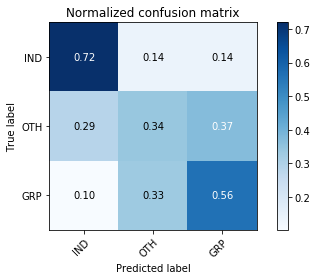

In [0]:
TARGET_TASK = 'subtask_c'
predictions = test_model('./lstm_bert_c/output5/CNN_Train_subtask_c_4.hdf5',TARGET_TASK)
np.set_printoptions(precision=2)
plot_confusion_matrix(test_label[TARGET_TASK], predictions,subtask=TARGET_TASK, classes=np.array([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('cfm_lstm_bert_c.png')
plt.show()